 Suppose we observe a **real-valued** input variable x and we wish to use this observation to predict the value of a real-valued target variable t.

For the present purposes, it is instructive to consider an artificial example using synthetically generated data 
because we then know the precise process that generated the data for comparison against any learned model

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from requirements.polynomial import PolynomialFeature
np.random.seed(1234)

creating toy data 

In [3]:
def create_toy_data(func,sample_size,std):
    x=np.linspace(0,1,sample_size)
    t=func(x)+np.random.normal(scale=std,size=x.shape)
    return x,t

def func(x):
    return np.sin(2*np.pi*x)

x_train,y_train=create_toy_data(func,10,0.25)
x_test=np.linspace(0,1,100)
y_test=func(x_test)


Plotting the test and train datasets 

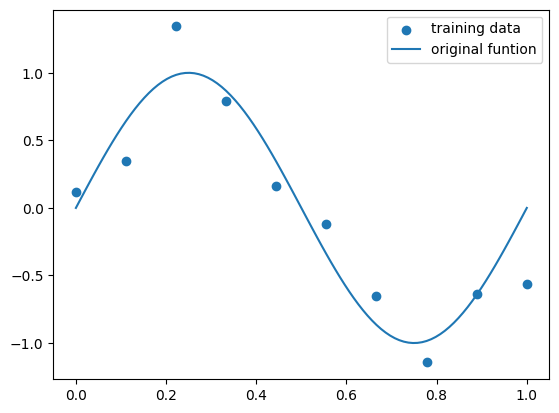

In [4]:
plt.scatter(x_train,y_train,label="training data")
plt.plot(x_test,y_test,label="original funtion")
plt.legend()
plt.show()

Our goal is to exploit this training set in order to make predictions of the valuêt of the target variable for some new value ̂x of the input variable

Now on solving the equation for a single variable x there are two problems in it what should be the coefficient and what should be the degree of the variable x so we try to optimize for different values of x 

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Mohan\AppData\Local\Temp\ipykernel_7736\3822288433.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")


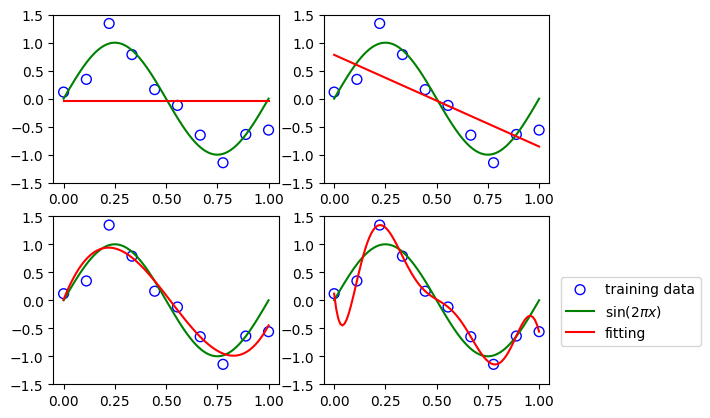

In [13]:
from requirements.linear import LinearRegression
for index,degree in enumerate([0,1,3,9]):
    plt.subplot(2,2,index+1)
    feature=PolynomialFeature(degree)
    X_train=feature.transform(x_train)
    X_test=feature.transform(x_test)
    model=LinearRegression() 
    model.fit(X_train,y_train)
    y=model.predict(X_test)

    plt.scatter(
        x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
    )
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.0)
plt.show()

root mean square error 

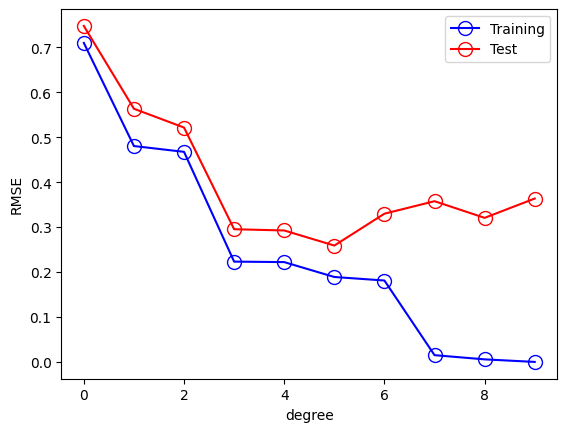

In [14]:
def rmse(a,b):
    return np.sqrt(np.mean(np.square(a-b)))
training_errors=[]
testing_errors=[]

for i in range(10):
    feature=PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y=model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train),y_train))
    testing_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, "o-", mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(testing_errors, "o-", mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

as we can see there are wild differences between training and testing cuz the model overfitted so as to not overfit we use a method called regularization where we add the weights obtained

In [21]:
from requirements.bayesian_regression import BayesRegression
model=BayesRegression(alpha=2e-3,beta=2)
model.fit(x_train,y_train)
y,y_err=model.predict(X_test,return_std=True)

plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.0)
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Mohan\AppData\Local\Temp\ipykernel_7736\4280319914.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")


IndexError: tuple index out of range